In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [3]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/wine.csv",usecols=[0,1,2])


In [4]:
df

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [5]:
#min max scalar 

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_2556\1597874384.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_scores)


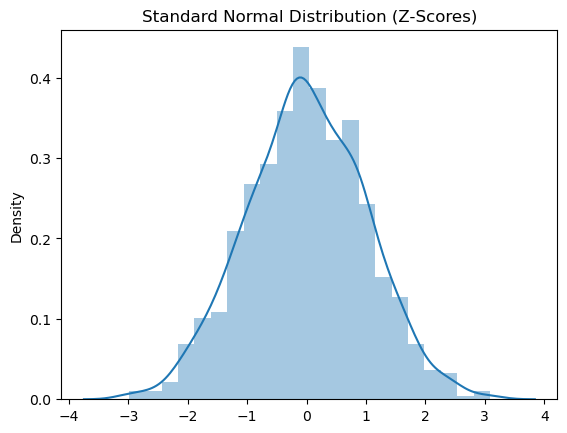

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Generate normally distributed data
mu, sigma = 50, 10  # Mean 50, Standard Deviation 10
data = np.random.normal(mu, sigma, 1000)

# Standardizing the data (converting to Z-scores)
z_scores = zscore(data)

# Plot the standardized data
sns.distplot(z_scores)
plt.title("Standard Normal Distribution (Z-Scores)")
plt.show()


<Axes: xlabel='Wine', ylabel='count'>

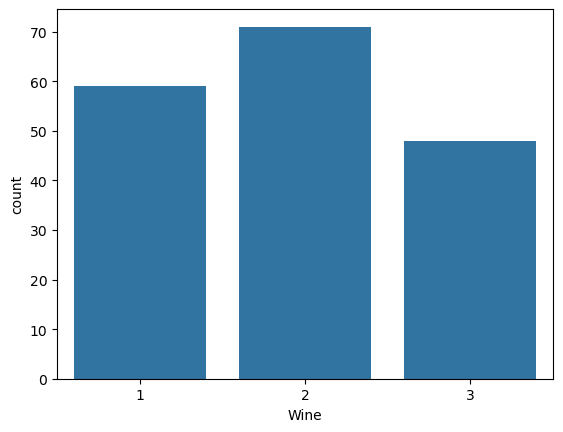

In [13]:
sns.countplot(x='Wine',data = df)

In [15]:
df.shape

(178, 3)

In [17]:
x = df.drop('Wine',axis=1)

In [19]:
y = df['Wine']

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 32)

In [37]:
x_train

,Alcohol,Malic.acid
158,14.34,1.68
5,14.20,1.76
150,13.50,3.12
167,12.82,3.37
10,14.10,2.16
...,...,...
88,11.64,2.06
124,11.87,4.31
54,13.74,1.67
133,12.70,3.55


In [43]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [49]:
x_train_scaled

,Alcohol,Malic.acid
0,0.871053,0.165966
1,0.834211,0.182773
2,0.650000,0.468487
3,0.471053,0.521008
4,0.807895,0.266807
...,...,...
137,0.160526,0.245798
138,0.221053,0.718487
139,0.713158,0.163866
140,0.439474,0.558824


In [51]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic.acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

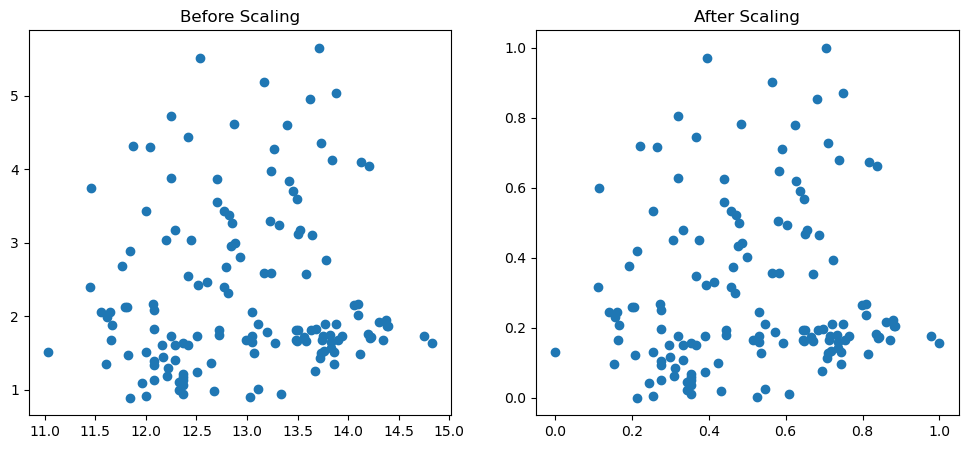

In [55]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic.acid'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic.acid'])
ax2.set_title("After Scaling")  